In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv("./Datasets/target-marketing-for-canadian-bank-2023w-aml1413/train.csv")
dataset

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,...,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,...,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63994,CTSP063995,0,40444.92,0,0,1,0,1,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
63995,CTSP063996,0,47395.91,0,0,0,0,0,0,0,...,1,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
63996,CTSP063997,1,10086.31,0,0,1,0,0,0,0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
63997,CTSP063998,0,26452.64,0,0,0,0,0,0,0,...,3,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125


In [30]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Target',axis=1)
y = dataset['Target']

Train_x, Test_x, train_y, test_y = train_test_split(X,y,test_size=.20,random_state=42)
Train_x.shape, Test_x.shape

((51199, 36), (12800, 36))

In [31]:
Train_x.columns

Index(['Customer_id', 'Balance', 'PreviousCampaignResult', 'Product1',
       'Product2', 'Product3', 'Product4', 'Product5', 'Product6',
       'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9', 'ExternalAccount1', 'ExternalAccount2',
       'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5',
       'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator',
       'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate'],
      dtype='object')

In [32]:
pd.set_option('display.max_columns', None)
Train_x.describe()

,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
count,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.00000,5.119900e+04,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000,51199.000000
mean,22711.287480,0.001406,0.201332,0.160218,0.001875,0.092287,0.022051,0.041934,314.476529,100.326622,976.091964,13382.122226,5893.54290,8.894483e+03,99.736671,1523.417616,1135.384836,0.197680,0.301803,0.082658,0.123694,0.191449,0.100744,0.019473,19.885916,0.593820,1.379737,1.837300,1.391821,1.757536,1.882623,1.678440,1.411387,1.678440,1.315238
std,10823.763728,0.038503,0.401000,0.366812,0.043262,0.289433,0.146852,0.200441,5225.408395,956.134111,6051.882238,25017.243225,21919.73086,3.023569e+04,884.751342,7449.831338,9808.021321,0.398253,0.459045,0.275367,0.329235,0.393445,0.300993,0.138182,106.758770,1.154811,0.206328,0.370247,0.161846,0.357309,0.515960,0.160612,0.574787,0.160612,0.106627
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.340000,-33813.000000,0.00000,-2.092436e+04,-957.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.025000,1.425000,1.125000,1.425000,1.175000,1.425000,0.525000,1.425000,1.125000
25%,13513.515000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.425000,1.575000,1.425000,1.575000,1.575000,1.675000,0.525000,1.675000,1.375000
50%,19995.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5700.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.425000,1.925000,1.425000,1.675000,2.375000,1.675000,1.575000,1.675000,1.375000
75%,30106.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17500.000000,2000.00000,5.500000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.575000,2.375000,1.575000,1.675000,2.375000,1.875000,1.575000,1.875000,1.375000
max,50000.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,505000.000000,85500.000000,633506.040000,917005.000000,1000000.00000,1.555749e+06,36186.980000,297055.190000,513627.920000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6762.000000,56.000000,1.575000,2.375000,1.575000,2.375000,2.375000,1.875000,2.125000,1.875000,1.375000


In [33]:
product_columns = ['Product1',
       'Product2', 'Product3', 'Product4', 'Product5', 'Product6']

last_transaction_columns = ['Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9']

external_account_columns = ['ExternalAccount1', 'ExternalAccount2',
       'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5',
       'ExternalAccount6', 'ExternalAccount7']

competitive_rate = [ 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7']


<Figure size 640x480 with 0 Axes>

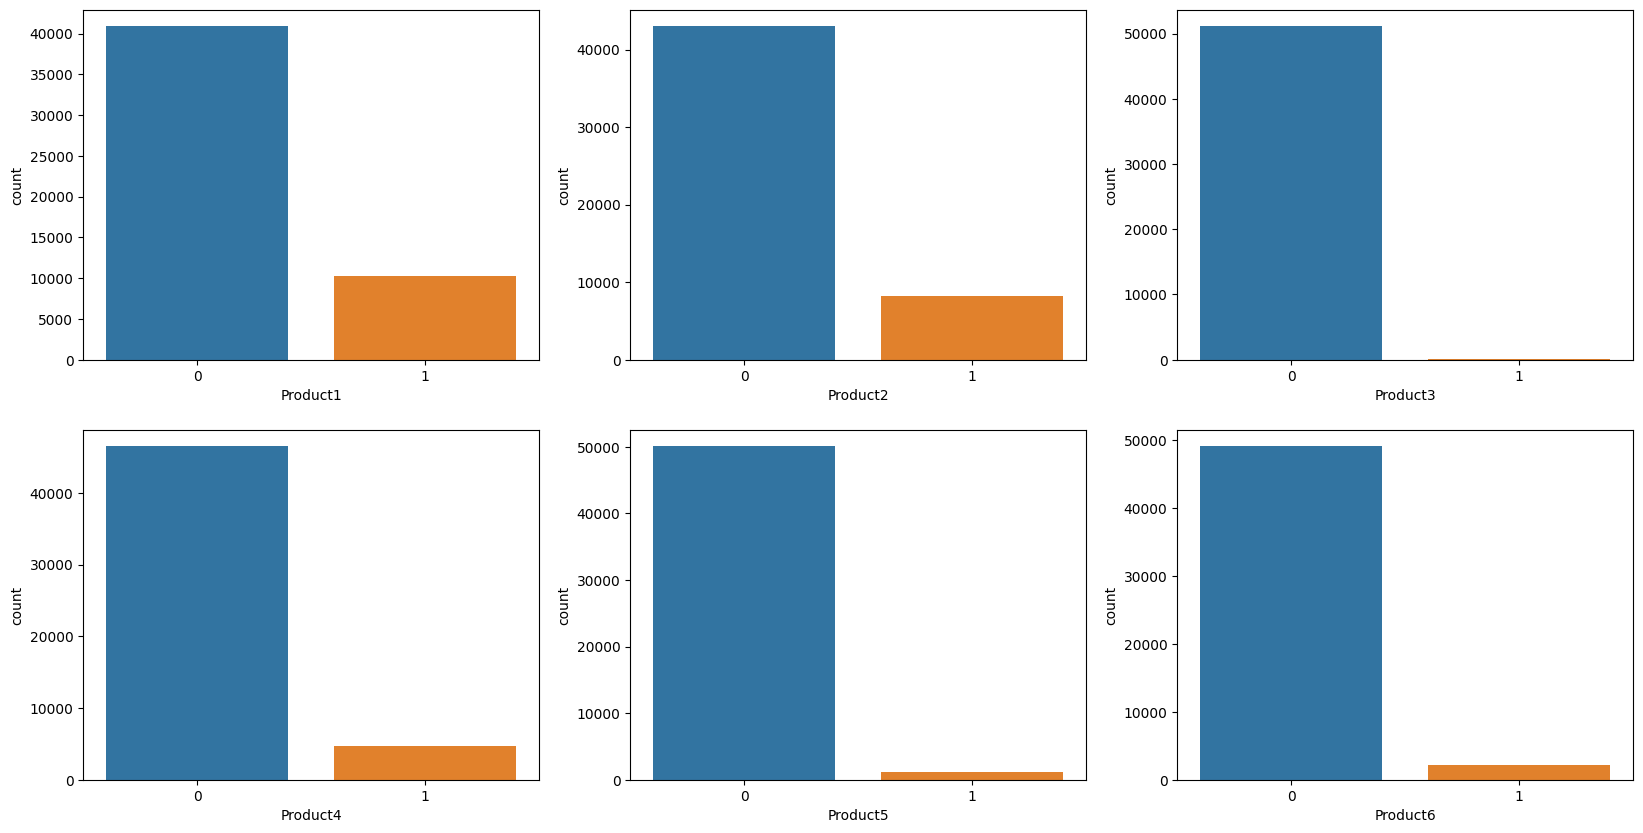

In [35]:
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1,
                    hspace=0.4)

plt.figure(figsize=(20,10))

for i,c in enumerate(product_columns):
    plt.subplot(2,3,i+1)
    sb.countplot(x= Train_x[c])
    
plt.show()

<Figure size 640x480 with 0 Axes>

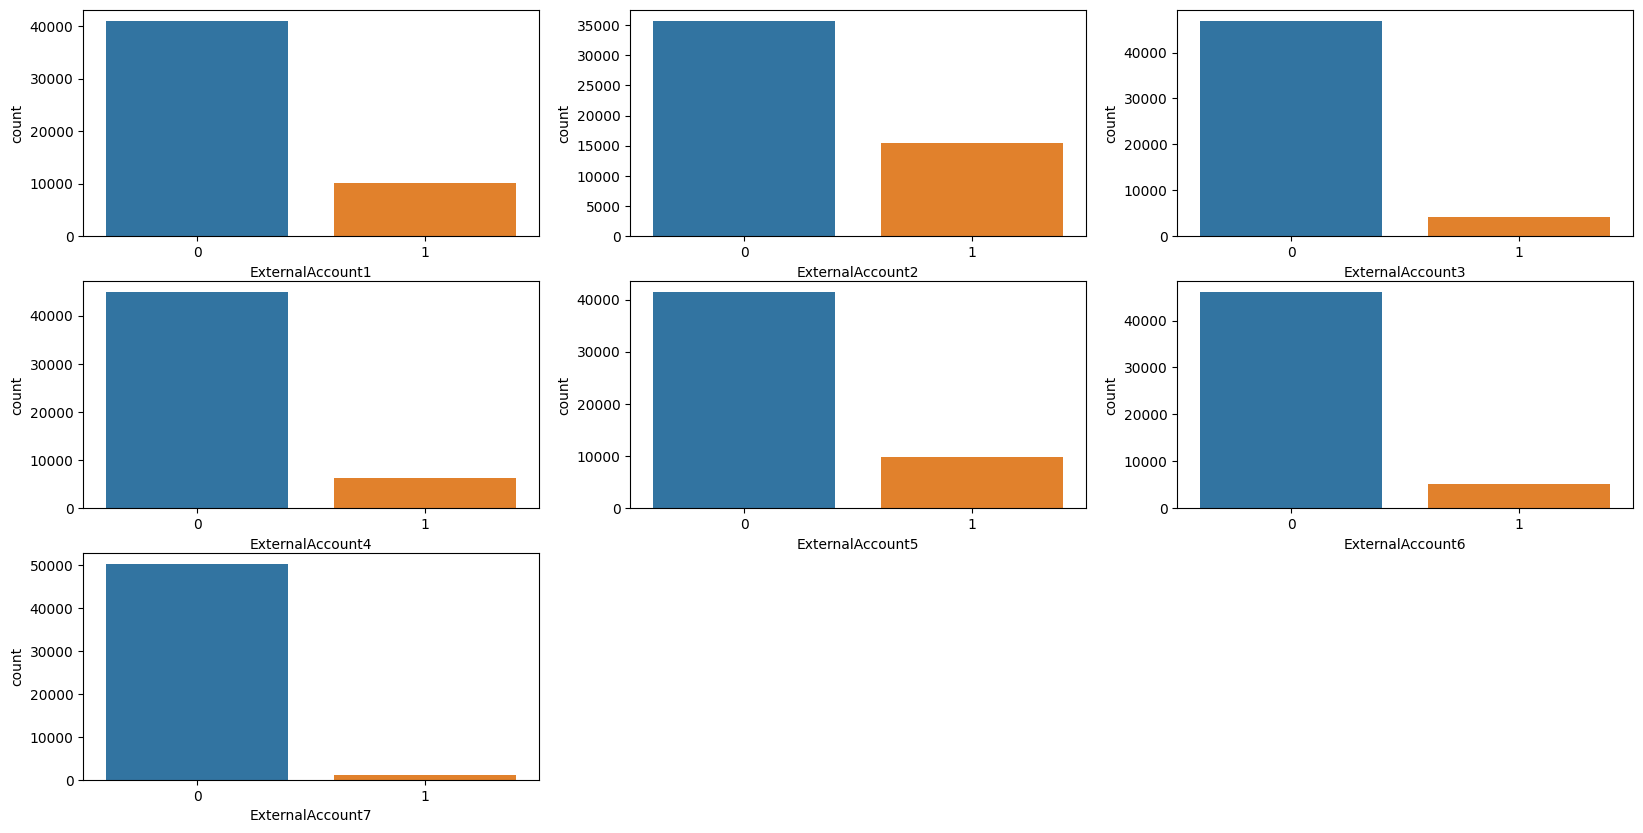

In [36]:
# set the spacing between subplots
plt.subplots_adjust(
                    wspace=1.4,
                    hspace=.7)
plt.figure(figsize=(20,10))


for i,c in enumerate(external_account_columns):
    plt.subplot(3,3,i+1)
    sb.countplot(x= Train_x[c])
    
plt.show()

<Figure size 640x480 with 0 Axes>

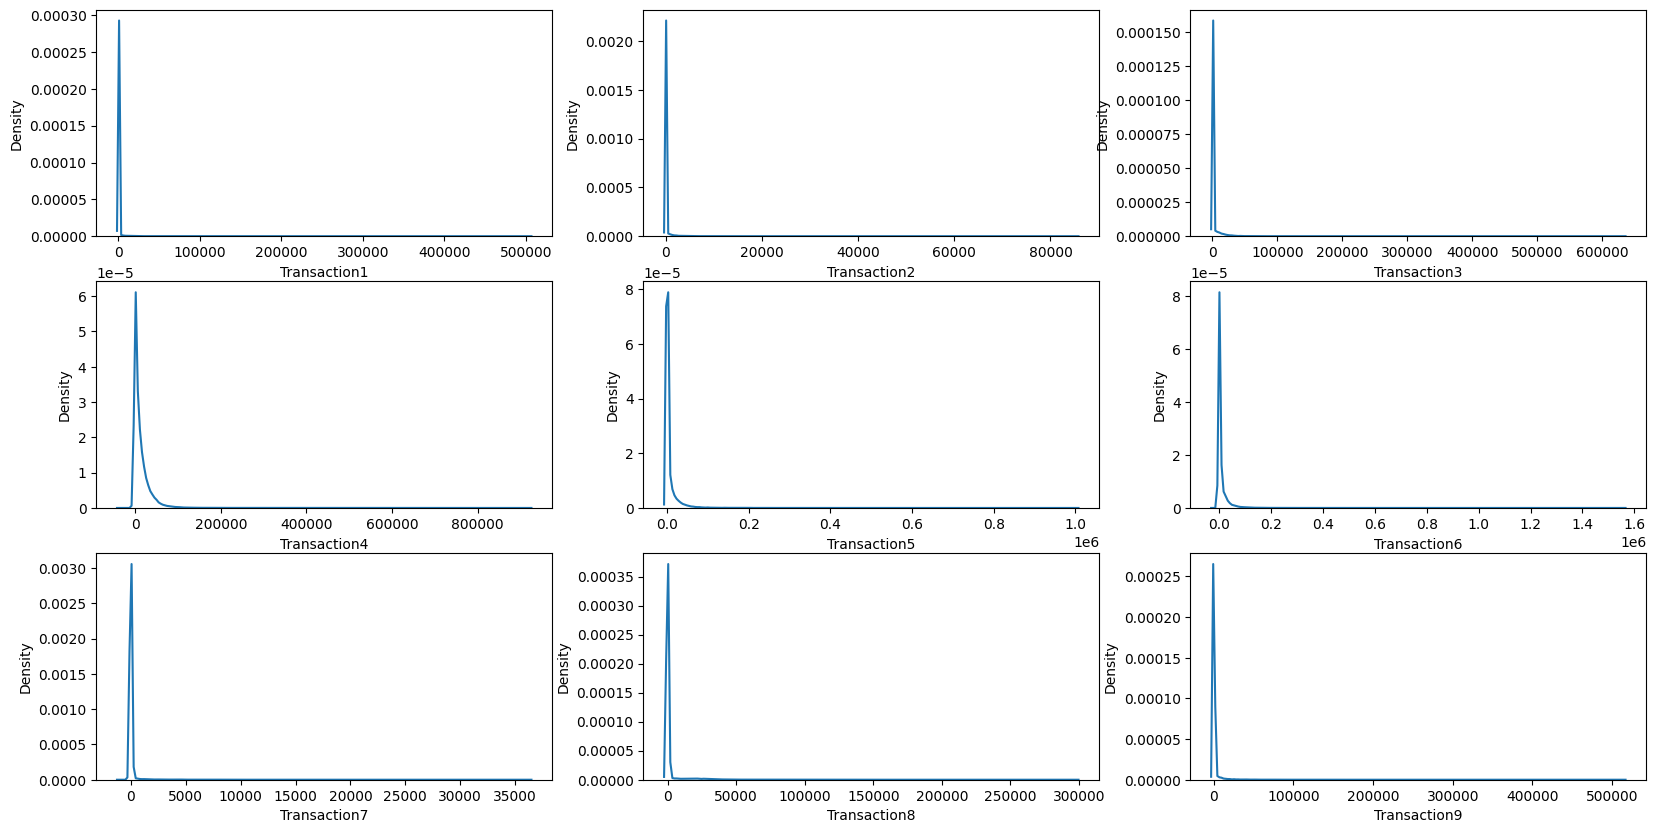

In [37]:
# set the spacing between subplots
plt.subplots_adjust(
                    wspace=1.4,
                    hspace=.7)
plt.figure(figsize=(20,10))


for i,c in enumerate(last_transaction_columns):
    plt.subplot(3,3,i+1)
    sb.kdeplot(x =Train_x[c])
    
plt.show()

<Figure size 640x480 with 0 Axes>

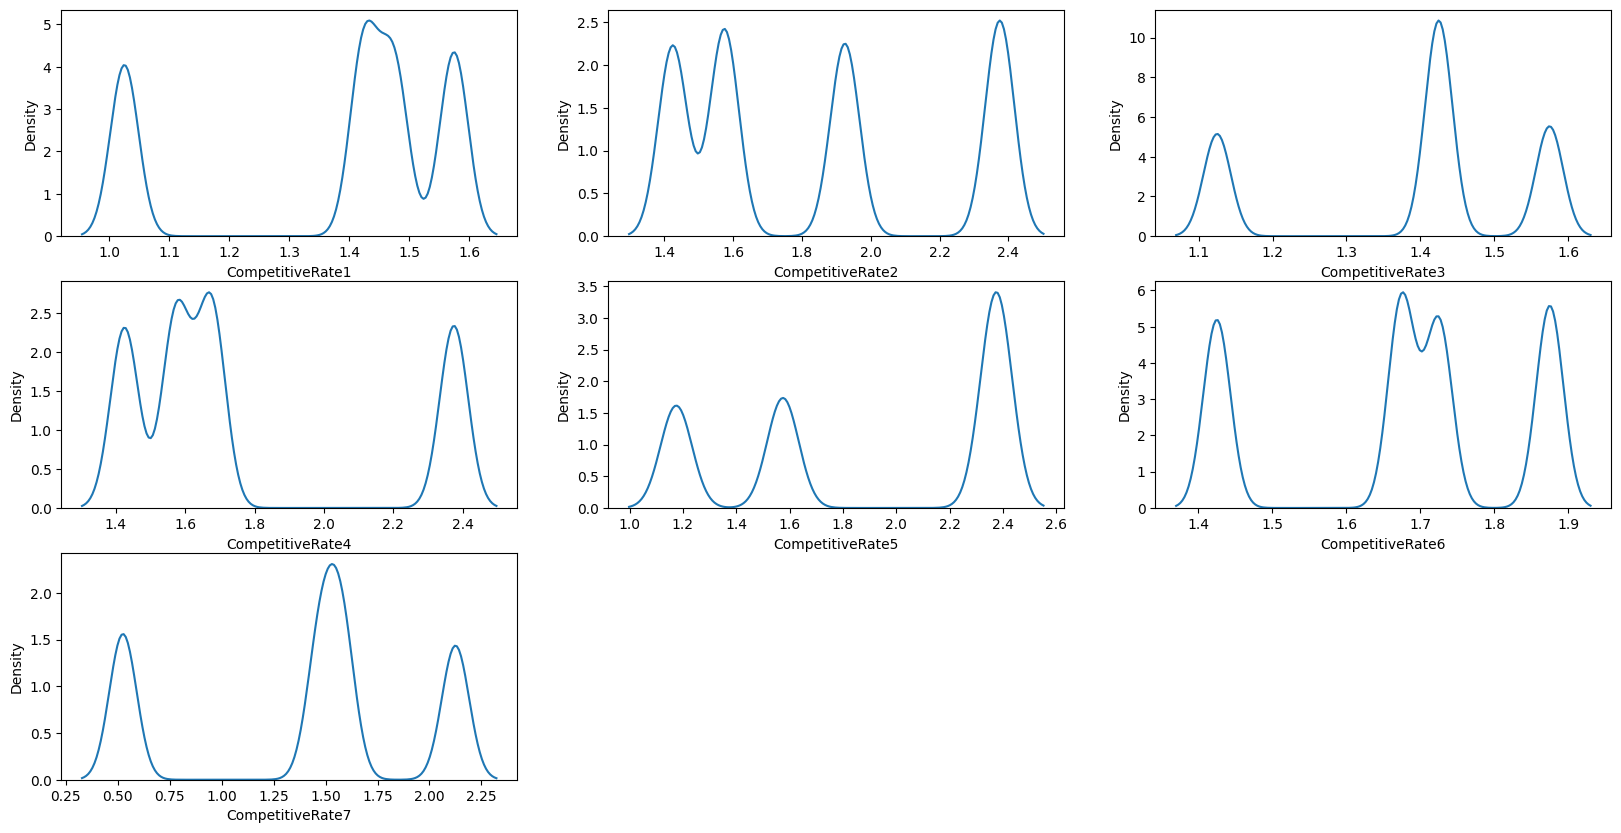

In [38]:
# set the spacing between subplots
plt.subplots_adjust(
                    wspace=1.4,
                    hspace=.7)
plt.figure(figsize=(20,10))


for i,c in enumerate(competitive_rate):
    plt.subplot(3,3,i+1)
    sb.kdeplot(x =Train_x[c])
    
plt.show()

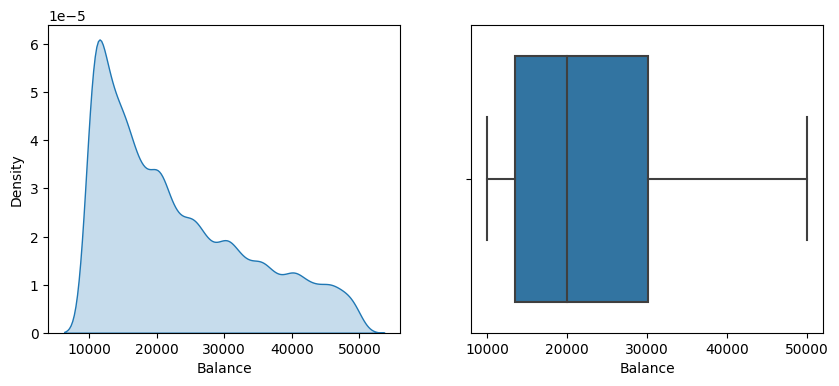

In [39]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.kdeplot(Train_x['Balance'],fill=True)
plt.subplot(1,2,2)
sb.boxplot(x=Train_x['Balance'])
plt.show()

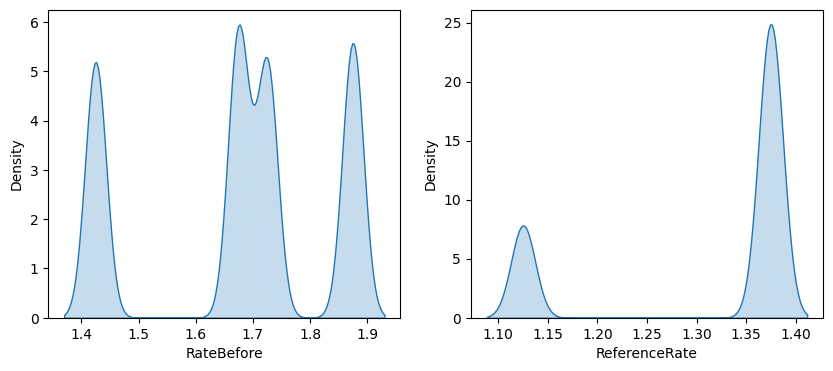

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.kdeplot(Train_x['RateBefore'],fill=True)
plt.subplot(1,2,2)
sb.kdeplot(Train_x['ReferenceRate'],fill=True)
plt.show()

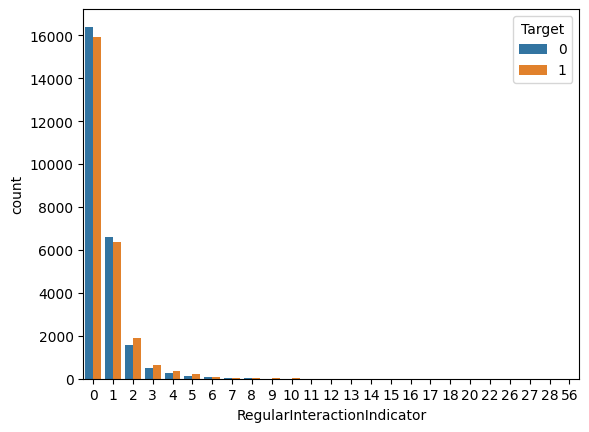

In [41]:
sb.countplot(x=Train_x['RegularInteractionIndicator'],hue=train_y)
plt.show()

In [42]:
dataset['RegularInteractionIndicator'].value_counts()

0     40401
1     16183
2      4366
3      1422
4       743
5       398
6       199
7       101
8        66
9        30
10       26
11       15
12       12
13        9
15        7
14        4
16        3
18        3
20        2
17        2
22        2
27        1
56        1
52        1
28        1
26        1
Name: RegularInteractionIndicator, dtype: int64

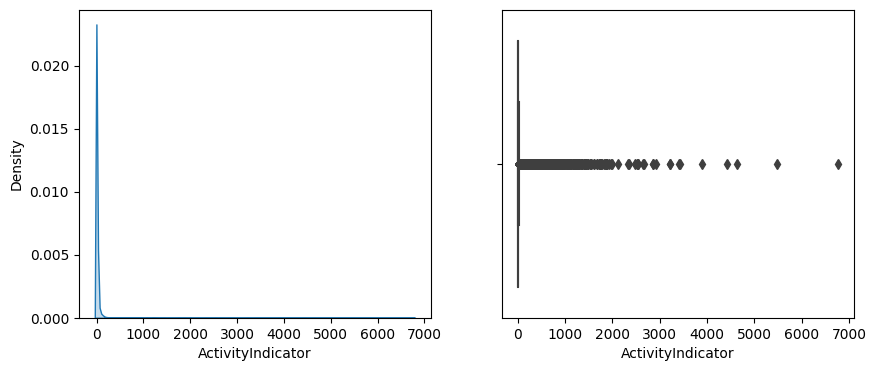

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.kdeplot(Train_x['ActivityIndicator'],fill=True)
plt.subplot(1,2,2)
sb.boxplot(x=Train_x['ActivityIndicator'])
plt.show()

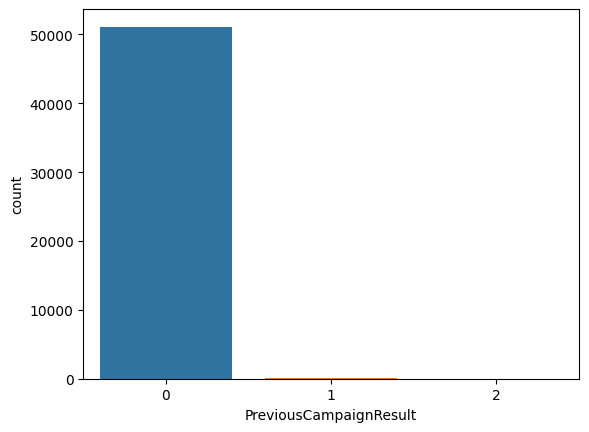

0    51129
1       68
2        2
Name: PreviousCampaignResult, dtype: int64

In [45]:
sb.countplot(x=Train_x['PreviousCampaignResult'])
plt.show()
Train_x['PreviousCampaignResult'].value_counts()

<AxesSubplot: xlabel='RateBefore', ylabel='ReferenceRate'>

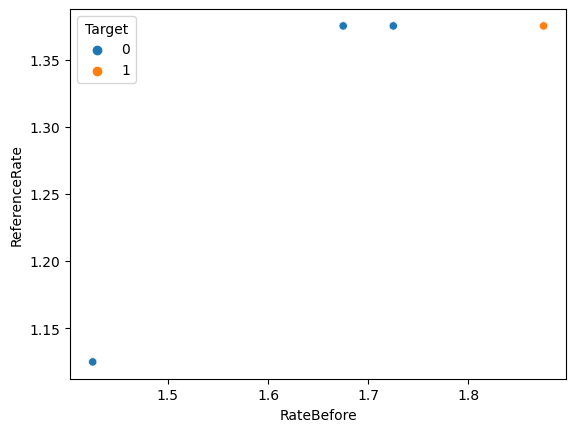

In [46]:
sb.scatterplot(x=dataset['RateBefore'],y=dataset['ReferenceRate'],hue=dataset['Target'])

C:\Users\jeetc\AppData\Local\Temp\ipykernel_28220\3360742492.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(dataset.corr(),fmt=".2f",annot=True)


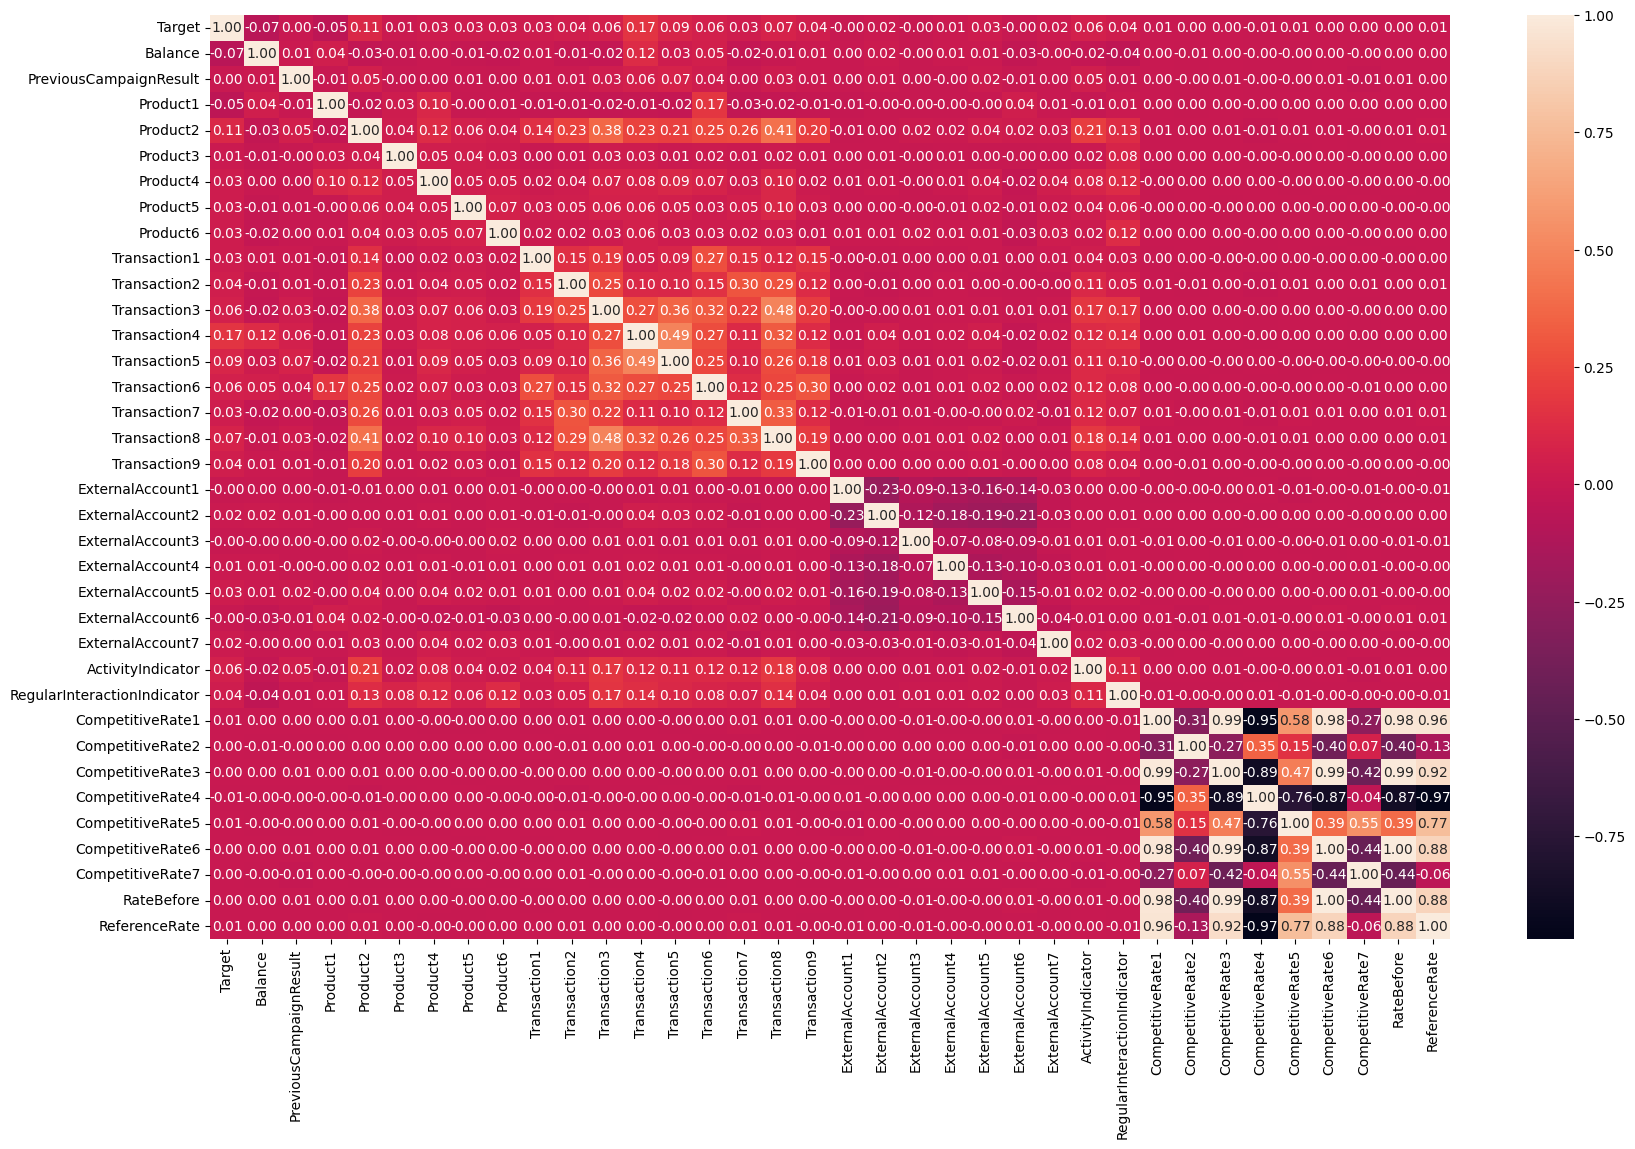

In [47]:
plt.figure(figsize=(20,12))
sb.heatmap(dataset.corr(),fmt=".2f",annot=True)
plt.show()

In [52]:
from sklearn.base import BaseEstimator,TransformerMixin

selected_columns = [ 'Balance', 'Product1',
       'Product2', 'Product3', 'Product4', 'Product5', 'Product6',
       'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9', 'ExternalAccount1', 'ExternalAccount2',
       'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5',
       'ExternalAccount6', 'ExternalAccount7',
       'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate']

# selected_col_index = [list(train_x.columns).index(c) for c in selected_columns]

class DataSelector(BaseEstimator,TransformerMixin):
    def __init__(self,columns):
        self.cols = columns
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X[self.cols]
    
class NothingTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
            pass
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X
    

selector = DataSelector(selected_columns)

train_x = selector.transform(Train_x)
test_x = selector.transform(Test_x)


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


def DisplayCVScore(model,train_x,train_y,cv=5):
    scores = np.array(cross_val_score(model,train_x,train_y,cv=cv,scoring="accuracy"))
    print(f'scores = {scores} \nAverage accuracy : {scores.mean()}')
    print(f'\n{confusion_matrix(test_y,y_pred=model.predict(test_x))} ')
    

## Baseline Logistic

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

baseline_pipe = Pipeline(steps=[("scaler",StandardScaler()),("model",LogisticRegression())])

baseline_pipe.fit(train_x,train_y)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [54]:
baseline_pipe.score(test_x,test_y)

0.6140625

In [59]:
DisplayCVScore(baseline_pipe,train_x,train_y)

scores = [0.61582031 0.61416016 0.61865234 0.61240234 0.61304815] 
Average accuracy : 0.6148166610966647


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

model = RandomForestClassifier(n_jobs=-1,n_estimators=200)
standard_scaler = StandardScaler()

rf2_pipe = Pipeline(steps=[("scaler",min_max_scaler),("model",model)])
DisplayCVScore(rf2_pipe,train_x,train_y)

scores = [0.58837891 0.59013672 0.59560547 0.59003906 0.59302666] 
Average accuracy : 0.591437363802007


## SVC

In [62]:
from sklearn.svm import SVC

cv_pipe = Pipeline(steps=[("scaler",StandardScaler()),("model",SVC())])
DisplayCVScore(cv_pipe,train_x,train_y)

scores = [0.61328125 0.61015625 0.61337891 0.61201172 0.6111925 ] 
Average accuracy : 0.6120041248535013


## Implement Logistic Regression with Ploynomial Features

In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
ploy_big_pipe = Pipeline(steps=[("ploy features ",poly_features),("scaler",StandardScaler()),("model",LogisticRegression())])
DisplayCVScore(ploy_big_pipe,train_x,train_y)


C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

scores = [0.61357422 0.61064453 0.61464844 0.615625   0.61646645] 
Average accuracy : 0.6141917278603868

[[4419 2015]
 [2925 3441]] 


## Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()

min_max_scaler = MinMaxScaler()

gnd_pipe = Pipeline(steps=[("scaler",min_max_scaler),("model",gaussian_nb)])
DisplayCVScore(gnd_pipe,train_x,train_y)

scores = [0.53769531 0.54736328 0.53798828 0.54121094 0.53833382] 
Average accuracy : 0.5405183268324543

[[4419 2015]
 [2925 3441]] 


### Stacking with Top 3 Classifier

In [73]:
from sklearn.ensemble import StackingClassifier

estimators = [("logistic",baseline_pipe),("random forest",rf2_pipe),("naive bayes",ploy_big_pipe)]

stacking_classifier = StackingClassifier(estimators=estimators)

In [74]:
scores = cross_val_score(stacking_classifier,train_x,train_y,cv=3,scoring="accuracy")
scores

C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

array([0.61369895, 0.61936013, 0.61807102])

## Implement with NN

In [105]:
from tensorflow import keras

nn = keras.models.Sequential([keras.layers.Dense(units=595,input_shape=(244,),activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
                             keras.layers.Dense(1200,activation="relu",kernel_regularizer=keras.regularizers.l2(0.01)),
                             keras.layers.Dense(100,activation="relu"),
                             keras.layers.Dense(1,activation="sigmoid")
                             ])
nn.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=["accuracy"])

In [106]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 595)               145775    
                                                                 
 dense_10 (Dense)            (None, 1200)              715200    
                                                                 
 dense_11 (Dense)            (None, 100)               120100    
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 981,176
Trainable params: 981,176
Non-trainable params: 0
_________________________________________________________________


In [107]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

all_train_cols = [
 'Balance',
 'Product1',
 'Product2',
 'Product3',
 'Product4',
 'Product5',
 'Product6',
 'Transaction1',
 'Transaction2',
 'Transaction3',
 'Transaction4',
 'Transaction5',
 'Transaction6',
 'Transaction7',
 'Transaction8',
 'Transaction9',
 'ExternalAccount1',
 'ExternalAccount2',
 'ExternalAccount3',
 'ExternalAccount4',
 'ExternalAccount5',
 'ExternalAccount6',
 'ExternalAccount7',
 'RegularInteractionIndicator',
 'CompetitiveRate1',
 'CompetitiveRate2',
 'CompetitiveRate3',
 'CompetitiveRate4',
 'CompetitiveRate5',
 'CompetitiveRate6',
 'CompetitiveRate7',
 'RateBefore',
 'ReferenceRate']

cat_cols = product_columns+external_account_columns
num_cols = list(set(all_train_cols).difference(set(cat_cols)))

poly_features_nn = PolynomialFeatures(degree=2)
poly_nn_pipe = Pipeline(steps=[("ploy features ",poly_features_nn),("scaler",StandardScaler())])

column_transformer = make_column_transformer((poly_nn_pipe,num_cols),(NothingTransformer(),cat_cols))
preprocess_pipe = Pipeline([("column_transformer",column_transformer)])

# preprocess_pipe.fit_transform(train_x).shape
# num_cols

early_stopping = EarlyStopping(patience=10,restore_best_weights=True)

hist = nn.fit(preprocess_pipe.fit_transform(train_x),train_y,epochs=200,callbacks=[early_stopping],validation_split=.2)


Epoch 1/200
1280/1280 [==============================] - 16s 12ms/step - loss: 0.8912 - accuracy: 0.6015 - val_loss: 0.6799 - val_accuracy: 0.5850
Epoch 2/200
1280/1280 [==============================] - 15s 12ms/step - loss: 0.6683 - accuracy: 0.6135 - val_loss: 0.6641 - val_accuracy: 0.6212
Epoch 3/200
1280/1280 [==============================] - 15s 12ms/step - loss: 0.6645 - accuracy: 0.6140 - val_loss: 0.6644 - val_accuracy: 0.6135
Epoch 4/200
1280/1280 [==============================] - 15s 12ms/step - loss: 0.6634 - accuracy: 0.6156 - val_loss: 0.6622 - val_accuracy: 0.6177
Epoch 5/200
1280/1280 [==============================] - 15s 11ms/step - loss: 0.6627 - accuracy: 0.6153 - val_loss: 0.6592 - val_accuracy: 0.6203
Epoch 6/200
1280/1280 [==============================] - 15s 12ms/step - loss: 0.6616 - accuracy: 0.6172 - val_loss: 0.6655 - val_accuracy: 0.6095
Epoch 7/200
1280/1280 [==============================] - 15s 12ms/step - loss: 0.6618 - accuracy: 0.6156 - val_loss: 0

<AxesSubplot: >

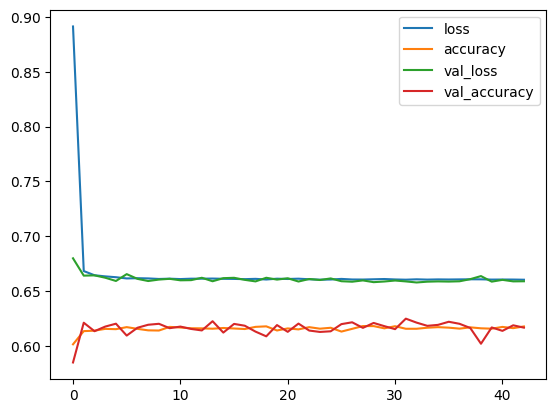

In [108]:
pd.DataFrame(hist.history).plot()

In [109]:
y_pred = nn.predict(preprocess_pipe.transform(test_x))
y_pred = (y_pred > .5).astype("int32")
y_pred

400/400 [==============================] - 2s 4ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(test_y,y_pred),accuracy_score(test_y,y_pred)

(array([[4390, 2044],
        [2780, 3586]], dtype=int64),
 0.623125)

In [117]:
def saveForSumbission(model=None,file_name="f_1",selected_cols=None,isNN=False,y_pred=None):
    comp_test = pd.read_csv("./Datasets/target-marketing-for-canadian-bank-2023w-aml1413/test.csv")
    
        
    # Preprocess
    ids = comp_test['Customer_id']
    
    if len(y_pred):
        comp_y = pd.DataFrame(zip(ids,[i[0] for i in y_pred]),columns=["Customer_id","Target"])
        comp_y.to_csv(f'{file_name.replace(" ","")}.csv',index=False)
        return comp_y
    
    data_selector = DataSelector(selected_cols)
    c_test_x = data_selector.transform(comp_test)
    y_pred = model.predict(c_test_x)
    
    comp = ""
    if isNN:
        comp_y = pd.DataFrame(zip(ids,[i[0] for i in y_pred]),columns=["Customer_id","Target"])
    else:
        comp_y = pd.DataFrame(zip(ids,y_pred),columns=["Customer_id","Target"])
        
    comp_y.to_csv(f'{file_name.replace(" ","")}.csv',index=False)
    
    return comp_y

In [118]:
saveForSumbission(file_name="comp_nn",y_pred=y_pred)

,Customer_id,Target
0,CTSP063999,0
1,CTSP064000,0
2,CTSP064001,0
3,CTSP064002,1
4,CTSP064003,0
...,...,...
1475,CTSP065474,1
1476,CTSP065475,0
1477,CTSP065476,1
1478,CTSP065477,0
